In [16]:
from os.path import join

image_dir = 'train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                            '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                            '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                            '0e79be614f12deb4f7cae18614b7391b.jpg']]

In [44]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [45]:
from tensorflow.keras.applications import ResNet50

my_model = ResNet50()
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

1/1 [==============================] - 3s 3s/step


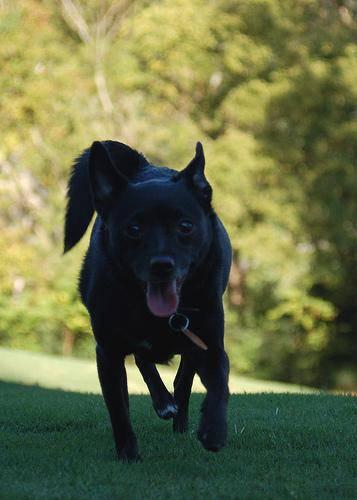

[('n02093256', 'Staffordshire_bullterrier', 0.37935922), ('n02099712', 'Labrador_retriever', 0.26180416), ('n02093428', 'American_Staffordshire_terrier', 0.21227585)]


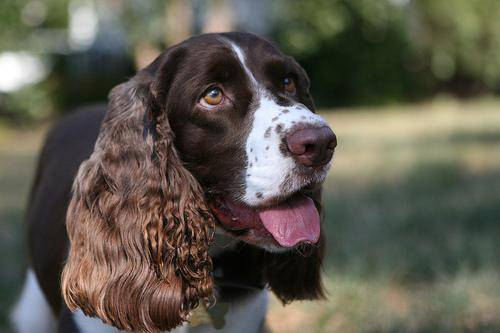

[('n02102040', 'English_springer', 0.94379747), ('n02101556', 'clumber', 0.023635058), ('n02102480', 'Sussex_spaniel', 0.009090514)]


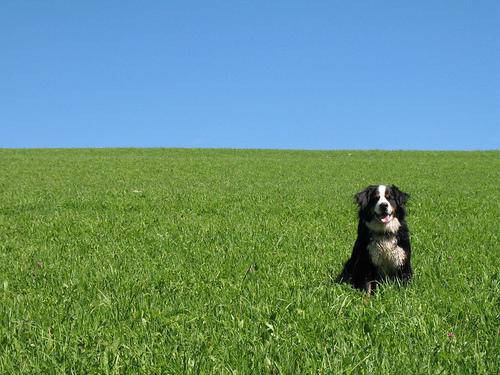

[('n02107683', 'Bernese_mountain_dog', 0.45761442), ('n02100735', 'English_setter', 0.25876305), ('n02102040', 'English_springer', 0.123042926)]


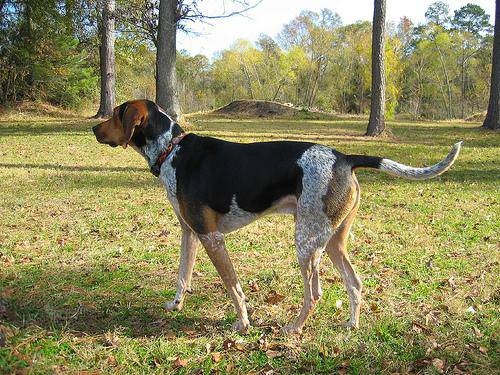

[('n02088632', 'bluetick', 0.99174434), ('n02089867', 'Walker_hound', 0.006791502), ('n02089973', 'English_foxhound', 0.0008508445)]


In [46]:
from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

In [23]:
import os
from os.path import join


hot_dog_image_dir = 'food/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename).replace('\\','/') for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = 'food/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename).replace('\\','/') for filename in
                            ['823536.jpg',
                             '99890.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

In [25]:
from IPython.display import Image, display
from learntools.deep_learning.decode_predictions import decode_predictions
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array


image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


my_model = ResNet50()
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

most_likely_labels = decode_predictions(preds, top=3, class_list_path='food/imagenet_class_index.json')

1/1 [==============================] - 1s 1s/step


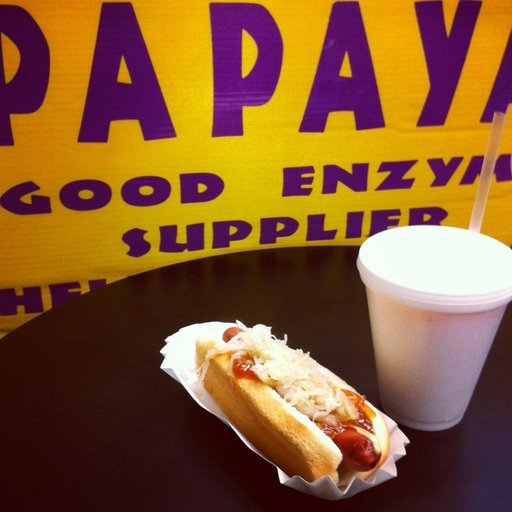

[('n07697537', 'hotdog', 0.9068862), ('n01981276', 'king_crab', 0.051901855), ('n07697313', 'cheeseburger', 0.005489119)]


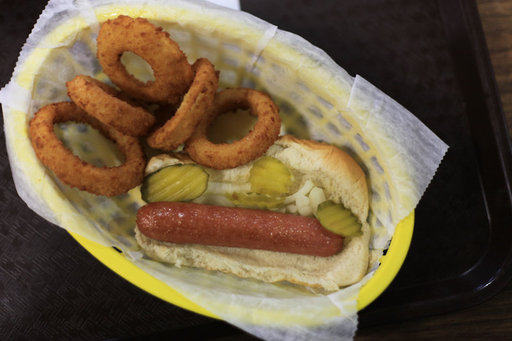

[('n07697537', 'hotdog', 0.97324175), ('n07697313', 'cheeseburger', 0.023891442), ('n02776631', 'bakery', 0.0005756516)]


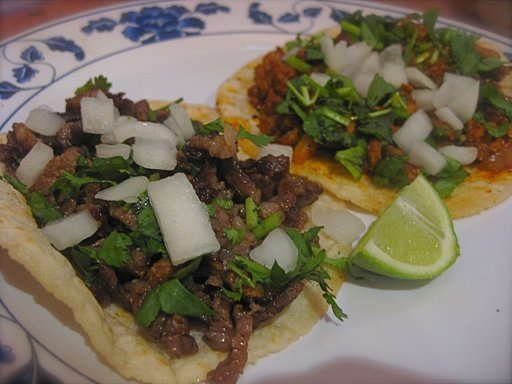

[('n07579787', 'plate', 0.84794533), ('n07880968', 'burrito', 0.050176393), ('n07697537', 'hotdog', 0.045182645)]


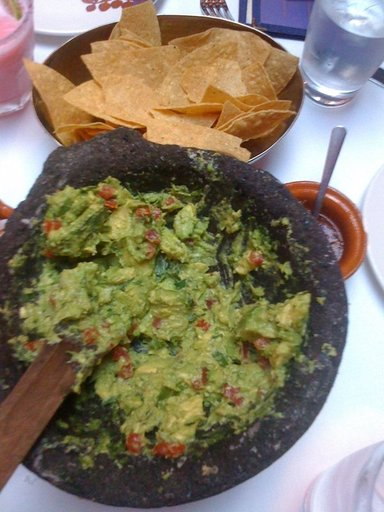

[('n07583066', 'guacamole', 0.99991226), ('n03786901', 'mortar', 2.3132774e-05), ('n07579787', 'plate', 1.1259079e-05)]


In [26]:
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

In [27]:
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_3 import *
print("Setup Complete")

Setup Complete


In [49]:
decoded = decode_predictions(preds, top=1, class_list_path='food/imagenet_class_index.json')
print(decoded)

def is_hot_dog(preds):
    preds = decode_predictions(preds, class_list_path='food/imagenet_class_index.json')
    answer = []
    for x in preds:
        print(x[0][1])
        if x[0][1] == 'hotdog':
            answer.append(True)
        else:
            answer.append(False)
    return answer
    
# Check your answer
q_1.check()

[[('n07697537', 'hotdog', 0.9068862)], [('n07697537', 'hotdog', 0.97324175)], [('n07579787', 'plate', 0.84794533)], [('n07583066', 'guacamole', 0.99991226)]]
hotdog
hotdog
plate
guacamole


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [50]:
my_model = ResNet50()
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

1/1 [==============================] - 5s 5s/step


In [54]:
def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    test_data = read_and_prep_images(paths_to_hotdog_images)
    preds = model.predict(test_data)
    preds = decode_predictions(preds, class_list_path='food/imagenet_class_index.json')
    answer = 0
    i = 0
    for x in preds:
        if x[0][1] == 'hotdog':
            answer += 1
        i += 1
            
    test_data = read_and_prep_images(paths_to_other_images)
    preds = model.predict(test_data)
    preds = decode_predictions(preds, class_list_path='food/imagenet_class_index.json')
    answerNotHotDog = []
    for x in preds:
        if x[0][1] != 'hotdog':
            answer += 1
        i += 1
    answer = answer/i
    return answer

# Code to call calc_accuracy.  my_model, hot_dog_paths and not_hot_dog_paths were created in the setup code
my_model_accuracy = calc_accuracy(my_model, hot_dog_paths, not_hot_dog_paths)
print("Fraction correct in small test set: {}".format(my_model_accuracy))

# Check your answer
q_2.check()

1/1 [==============================] - 1s 1s/step
Fraction correct in small test set: 1.0
Testing model on larger dataset. This takes a few seconds. 


1/1 [==============================] - 2s 2s/step
Larger dataset model accuracy: 0.85


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [55]:
from tensorflow.keras.applications import VGG16


vgg16_model = VGG16()
# calculate accuracy on small dataset as a test
vgg16_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)

print("Fraction correct in small dataset: {}".format(vgg16_accuracy))

# Check your answer
q_3.check()

1/1 [==============================] - 3s 3s/step
Fraction correct in small dataset: 1.0
Testing VGG16 on a larger dataset. This can take a few seconds


1/1 [==============================] - 1s 1s/step
Accuracy of VGG16 on larger dataset is 0.825


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [57]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

94765736/94765736 [==============================] - 11s 0us/step


In [58]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


C:\Users\Dominik\AppData\Local\Temp\ipykernel_17860\4118016977.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_new_model.fit_generator(


3/3 [==============================] - 18s 3s/step - loss: 0.8901 - accuracy: 0.5556 - val_loss: 0.1065 - val_accuracy: 1.0000


In [61]:
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_4 import *
print("Setup Complete")

Setup Complete


In [62]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [63]:
my_new_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [68]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocess_input)

train_generator = data_generator.flow_from_directory(
                                        directory='../input/dogs-gone-sideways/images/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
                                        directory='../input/dogs-gone-sideways/images/val',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

# fit_stats below saves some statistics describing how model fitting went
# the key role of the following line is how it changes my_new_model by fitting to data
fit_stats = my_new_model.fit_generator(train_generator,
                                       steps_per_epoch=22,
                                       validation_data=validation_generator,
                                       validation_steps=1)

# Check your answer
step_4.check()

Found 220 images belonging to 2 classes.
Found 217 images belonging to 2 classes.


C:\Users\Dominik\AppData\Local\Temp\ipykernel_17860\3869620029.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_stats = my_new_model.fit_generator(train_generator,


22/22 [==============================] - 7s 227ms/step - loss: 0.5592 - accuracy: 0.7955 - val_loss: 0.1981 - val_accuracy: 0.9375


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [69]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory(
        '../input/urban-and-rural-photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        '../input/urban-and-rural-photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


C:\Users\Dominik\AppData\Local\Temp\ipykernel_17860\94896829.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_new_model.fit_generator(


Epoch 1/2
3/3 [==============================] - 2s 526ms/step - loss: 0.1819 - accuracy: 0.9444 - val_loss: 0.1803 - val_accuracy: 0.9500
Epoch 2/2
3/3 [==============================] - 2s 530ms/step - loss: 0.1361 - accuracy: 0.9444 - val_loss: 0.1793 - val_accuracy: 0.9500


In [70]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(num_classes, activation='softmax'))

my_new_model.layers[0].trainable = False

my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_5 import *
print("Setup Complete")

Setup Complete


In [71]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224

# Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [74]:
# Specify which type of ImageDataGenerator above is to load in training data
train_generator = data_generator_with_aug.flow_from_directory(
        directory = '../input/dogs-gone-sideways/images/train',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

# Specify which type of ImageDataGenerator above is to load in validation data
validation_generator = data_generator_no_aug.flow_from_directory(
        directory = '../input/dogs-gone-sideways/images/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator, # if you don't know what argument goes first, try the hint
        epochs = 3,
        steps_per_epoch=19,
        validation_data=validation_generator)

# Check your answer
q_3.check()

Found 220 images belonging to 2 classes.
Found 217 images belonging to 2 classes.


C:\Users\Dominik\AppData\Local\Temp\ipykernel_17860\729717686.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  my_new_model.fit_generator(


Epoch 1/3
19/19 [==============================] - 15s 458ms/step - loss: 0.4955 - accuracy: 0.7909 - val_loss: 0.1909 - val_accuracy: 0.9124
Epoch 2/3
19/19 [==============================] - 8s 330ms/step - loss: 0.1094 - accuracy: 0.9727 - val_loss: 0.1648 - val_accuracy: 0.9447
Epoch 3/3
19/19 [==============================] - 6s 222ms/step - loss: 0.0620 - accuracy: 0.9909 - val_loss: 0.1020 - val_accuracy: 0.9631


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout


img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_file = "../input/digit-recognizer/train.csv"
raw_data = pd.read_csv(train_file)

x, y = data_prep(raw_data)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Epoch 1/2
263/263 [==============================] - 12s 28ms/step - loss: 0.2191 - accuracy: 0.9347 - val_loss: 0.0746 - val_accuracy: 0.9776
Epoch 2/2
263/263 [==============================] - 6s 24ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0572 - val_accuracy: 0.9798


In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = "../input/fashionmnist/fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_7 import *
print("Setup Complete")

Using TensorFlow version 2.9.0
Setup Complete


In [94]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

# Your Code Here
fashion_model = Sequential()

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [93]:
# Your code here
fashion_model.add(Conv2D(12, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# Your code here
fashion_model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Flatten())
fashion_model.add(Dense(100, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))
# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [5]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 20)        2180      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 20)        3620      
                                                                 
 flatten (Flatten)           (None, 9680)              0         
                                                                 
 dense (Dense)               (None, 100)               968100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 975,030
Trainable params: 975,030
Non-trai

In [6]:
# Your code to compile the model in this cell

fashion_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# Check your answer
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
fashion_model.fit(x, y,
          batch_size=100,
          epochs=4,
          validation_split = 0.2)
q_5.check()

Epoch 1/4
480/480 [==============================] - 10s 10ms/step - loss: 0.4660 - accuracy: 0.8350 - val_loss: 0.3323 - val_accuracy: 0.8821
Epoch 2/4
480/480 [==============================] - 5s 9ms/step - loss: 0.2894 - accuracy: 0.8955 - val_loss: 0.2918 - val_accuracy: 0.8976
Epoch 3/4
480/480 [==============================] - 4s 9ms/step - loss: 0.2344 - accuracy: 0.9131 - val_loss: 0.2574 - val_accuracy: 0.9060
Epoch 4/4
480/480 [==============================] - 5s 10ms/step - loss: 0.1921 - accuracy: 0.9288 - val_loss: 0.2536 - val_accuracy: 0.9137


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [8]:
# Your code below
second_fashion_model = Sequential()
second_fashion_model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
second_fashion_model.add(Conv2D(10, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
second_fashion_model.add(Conv2D(10, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
second_fashion_model.add(Flatten())
second_fashion_model.add(Dense(80, activation='relu'))
second_fashion_model.add(Dense(80, activation='relu'))
second_fashion_model.add(Dense(num_classes, activation='softmax'))
second_fashion_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
second_fashion_model.fit(x, y,
          batch_size=100,
          epochs=6,
          validation_split = 0.2)
# Don't remove this line (ensures comptibility with tensorflow 2.0)
second_fashion_model.history.history['val_acc'] = second_fashion_model.history.history['val_accuracy']
# Check your answer
q_6.check()

Epoch 1/6
480/480 [==============================] - 6s 10ms/step - loss: 0.4963 - accuracy: 0.8222 - val_loss: 0.3615 - val_accuracy: 0.8706
Epoch 2/6
480/480 [==============================] - 4s 9ms/step - loss: 0.3210 - accuracy: 0.8830 - val_loss: 0.3163 - val_accuracy: 0.8882
Epoch 3/6
480/480 [==============================] - 4s 9ms/step - loss: 0.2657 - accuracy: 0.9018 - val_loss: 0.2901 - val_accuracy: 0.8981
Epoch 4/6
480/480 [==============================] - 4s 9ms/step - loss: 0.2296 - accuracy: 0.9151 - val_loss: 0.2701 - val_accuracy: 0.9053
Epoch 5/6
480/480 [==============================] - 4s 9ms/step - loss: 0.1975 - accuracy: 0.9271 - val_loss: 0.2627 - val_accuracy: 0.9048
Epoch 6/6
480/480 [==============================] - 4s 9ms/step - loss: 0.1710 - accuracy: 0.9372 - val_loss: 0.2561 - val_accuracy: 0.9112
Model summary from second_fashion_model.summary()
Model: "sequential_1"
_________________________________________________________________
 Layer (type)  

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_size = 30000
train_file = "../input/digit-recognizer/train.csv"
raw_data = pd.read_csv(train_file)

x, y = data_prep(raw_data)

model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 strides=2,
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(30, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Epoch 1/2
263/263 [==============================] - 3s 9ms/step - loss: 0.6196 - accuracy: 0.8065 - val_loss: 0.2165 - val_accuracy: 0.9380
Epoch 2/2
263/263 [==============================] - 2s 8ms/step - loss: 0.2608 - accuracy: 0.9212 - val_loss: 0.1308 - val_accuracy: 0.9607


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_8 import *
print("Setup Complete")

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = "../input/fashionmnist/fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)

Setup Complete


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

batch_size = 16

fashion_model = Sequential()
fashion_model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Conv2D(16, (3, 3), activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

fashion_model.fit(x, y,
          batch_size=batch_size,
          epochs=3,
          validation_split = 0.2)


fashion_model_1 = Sequential()
fashion_model_1.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
fashion_model_1.add(Conv2D(16, (3, 3), activation='relu', strides=2))
fashion_model_1.add(Flatten())
fashion_model_1.add(Dense(128, activation='relu'))
fashion_model_1.add(Dense(num_classes, activation='softmax'))

fashion_model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

fashion_model_1.fit(x, y,
          batch_size=batch_size,
          epochs=3,
          validation_split = 0.2)

# Check your answer
q_1.check()

Epoch 1/3
3000/3000 [==============================] - 21s 7ms/step - loss: 0.4029 - accuracy: 0.8547 - val_loss: 0.3914 - val_accuracy: 0.8534
Epoch 2/3
3000/3000 [==============================] - 20s 7ms/step - loss: 0.2586 - accuracy: 0.9046 - val_loss: 0.2662 - val_accuracy: 0.9037
Epoch 3/3
3000/3000 [==============================] - 21s 7ms/step - loss: 0.1881 - accuracy: 0.9307 - val_loss: 0.2583 - val_accuracy: 0.9146
Epoch 1/3
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4370 - accuracy: 0.8438 - val_loss: 0.3772 - val_accuracy: 0.8651
Epoch 2/3
3000/3000 [==============================] - 18s 6ms/step - loss: 0.2964 - accuracy: 0.8909 - val_loss: 0.2953 - val_accuracy: 0.8949
Epoch 3/3
3000/3000 [==============================] - 20s 7ms/step - loss: 0.2438 - accuracy: 0.9091 - val_loss: 0.2832 - val_accuracy: 0.8982


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>